In [262]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential

# Read in images

In [263]:
IMG_HEIGHT = IMG_WIDTH = 32
BATCH_SIZE = 32
(train_images, train_labels), (val_images, val_labels) = tf.keras.datasets.cifar10.load_data()

In [264]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Validation images shape: (10000, 32, 32, 3)
Validation labels shape: (10000, 1)


# Image Visualization

In [265]:
data_dict = {0 : "Airplane",
             1 : "Car",
             2 : "Bird",
             3 : "Cat",
             4 : "Deer",
             5 : "Dog",
             6 : "Frog",
             7 : "Horse",
             8 : "Ship",
             9 : "Truck",
            }

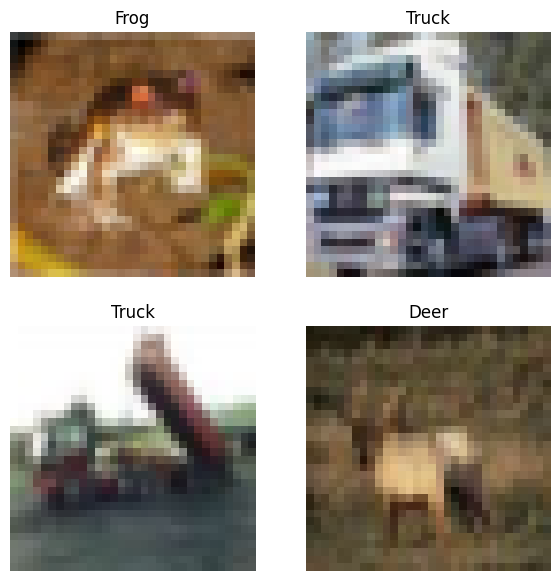

In [266]:
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(train_images[i].astype('uint8'))
    plt.title(data_dict[int(train_labels[i])])
    plt.axis("off")


# Preprocessing

In [267]:
# Normalization
train_images = train_images.astype('float32') / 255
val_images = val_images.astype('float32') / 255

In [268]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(buffer_size=len(train_images))
train_ds = train_ds.batch(BATCH_SIZE)
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# Create validation dataset
val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_ds = val_ds.batch(BATCH_SIZE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# NN

In [297]:
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
])

In [298]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [299]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_39 (Flatten)        (None, 3072)              0         
                                                                 
 dense_124 (Dense)           (None, 256)               786688    
                                                                 
 dense_125 (Dense)           (None, 128)               32896     
                                                                 
 dropout_50 (Dropout)        (None, 128)               0         
                                                                 
 dense_126 (Dense)           (None, 64)                8256      
                                                                 
 dropout_51 (Dropout)        (None, 64)                0         
                                                                 
 dense_127 (Dense)           (None, 10)              

In [300]:
EPOCHS = 25
history = model.fit(train_ds,
                    validation_data=val_ds, 
                    epochs=EPOCHS)

Epoch 1/25
1563/1563 [==============================] - 10s 4ms/step - loss: 2.1735 - accuracy: 0.2736 - val_loss: 1.9004 - val_accuracy: 0.3496
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8965 - accuracy: 0.3481 - val_loss: 1.8756 - val_accuracy: 0.3542
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8419 - accuracy: 0.3672 - val_loss: 1.7605 - val_accuracy: 0.4029
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8151 - accuracy: 0.3797 - val_loss: 1.7898 - val_accuracy: 0.3839
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8015 - accuracy: 0.3861 - val_loss: 1.7503 - val_accuracy: 0.3975
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7921 - accuracy: 0.3913 - val_loss: 1.7892 - val_accuracy: 0.3904
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7737 - accuracy: 0.4007 - val_loss: 1.6853 - val_accuracy

## Accuracy and Loss Graph

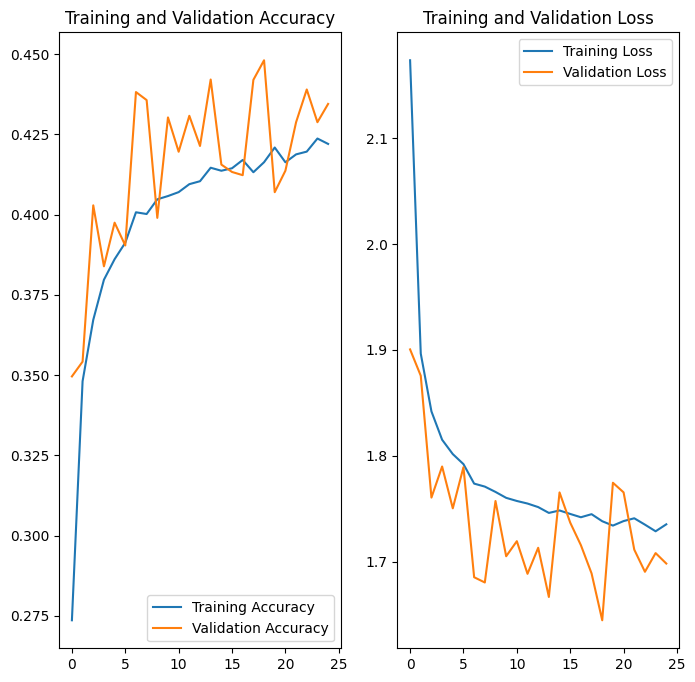

In [301]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [290]:
acc

[0.21398000419139862,
 0.24435999989509583,
 0.25415998697280884,
 0.25850000977516174,
 0.2631399929523468,
 0.2669999897480011,
 0.26548001170158386,
 0.27090001106262207,
 0.2719799876213074,
 0.2745000123977661,
 0.27456000447273254,
 0.27946001291275024,
 0.27869999408721924,
 0.27772000432014465,
 0.2765200138092041,
 0.27643999457359314,
 0.27880001068115234,
 0.2798199951648712,
 0.2756800055503845,
 0.27790001034736633,
 0.27691999077796936,
 0.27928000688552856,
 0.28007999062538147,
 0.277319997549057,
 0.27847999334335327]

In [291]:
val_acc

[0.2818000018596649,
 0.3010999858379364,
 0.2996000051498413,
 0.2971000075340271,
 0.3086000084877014,
 0.3027999997138977,
 0.31299999356269836,
 0.3089999854564667,
 0.2831999957561493,
 0.31119999289512634,
 0.32260000705718994,
 0.33160001039505005,
 0.3041999936103821,
 0.30790001153945923,
 0.3070000112056732,
 0.310699999332428,
 0.3165000081062317,
 0.31529998779296875,
 0.2671999931335449,
 0.31630000472068787,
 0.31130000948905945,
 0.32019999623298645,
 0.2987000048160553,
 0.32170000672340393,
 0.31540000438690186]

# CNN

In [276]:
model_cnn = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.GlobalMaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')       
])

In [277]:
model_cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [278]:
model_cnn.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 6, 6, 64)        

In [279]:
EPOCHS = 20
history_cnn = model_cnn.fit(train_ds,
                            validation_data=val_ds, 
                            epochs=EPOCHS)

Epoch 1/20
1563/1563 [==============================] - 13s 6ms/step - loss: 1.9784 - accuracy: 0.2229 - val_loss: 1.6842 - val_accuracy: 0.3480
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7100 - accuracy: 0.3473 - val_loss: 1.4798 - val_accuracy: 0.4395
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5967 - accuracy: 0.3982 - val_loss: 1.4631 - val_accuracy: 0.4628
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5287 - accuracy: 0.4374 - val_loss: 1.3918 - val_accuracy: 0.4920
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4767 - accuracy: 0.4642 - val_loss: 1.2785 - val_accuracy: 0.5420
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4269 - accuracy: 0.4871 - val_loss: 1.2711 - val_accuracy: 0.5446
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3972 - accuracy: 0.5014 - val_loss: 1.2437 - val_ac

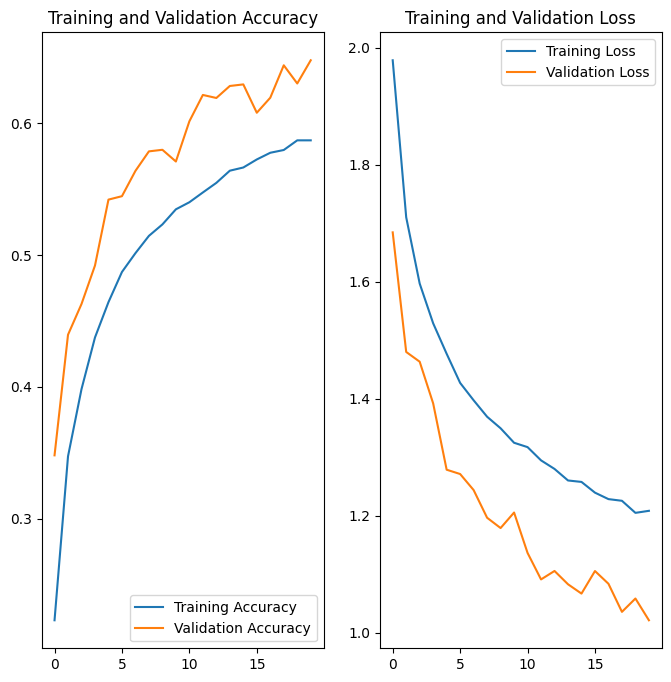

In [280]:
acc_cnn = history_cnn.history['accuracy']
val_acc_cnn = history_cnn.history['val_accuracy']

loss_cnn = history_cnn.history['loss']
val_loss_cnn = history_cnn.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_cnn, label='Training Accuracy')
plt.plot(epochs_range, val_acc_cnn, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_cnn, label='Training Loss')
plt.plot(epochs_range, val_loss_cnn, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()